In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import kstest

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

## Latar Belakang

Dalam industri supermarket yang kompetitif, memahami dan memenuhi kebutuhan pelanggan berdasarkan segmentasi pasar adalah kunci untuk meningkatkan penjualan dan kepuasan pelanggan. Segmentasi pasar memungkinkan supermarket untuk menargetkan strategi pemasaran yang lebih efektif, berdasarkan analisis perilaku pembelian pelanggan yang beragam.

## Pernyataan Masalah

Untuk meningkatkan efektivitas strategi pemasaran dan operasional, aspek-aspek ini akan membantu supermarket dalam menyusun strategi yang lebih baik untuk meningkatkan penjualan dan layanan pelanggan, antara lain:<br>
- Analisis Produk: Mana produk yang paling laris dan yang kurang diminati?
- Demografi Pelanggan: Bagaimana karakteristik demografis pelanggan seperti usia, pendidikan, dan pendapatan mempengaruhi pembelian mereka?
- Efektivitas Kampanye: Berapa besar pengaruh kampanye pemasaran terhadap penjualan produk?
- Analisis Tempat : Manakah tempat penjualan terbaik?

In [2]:
df = pd.read_csv('../Data/Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## Informasi kolom <br>
A. Pelanggan
- ID : ID unik pelanggan
- Year_Birth : Tahun lahir pelanggan
- Education : Pendidikan pelanggan
- Marital_Status : Status pernikahan pelanggan
- Income : Pendapatan rumah tangga pelanggan
- Kidhome : Jumlah anak dalam rumah tangga pelanggan
- Teenhome : Jumlah remaja di rumah tangga pelanggan
- Dt_Customer : Tanggal pendaftaran pelanggan dengan perusahaan
- Recency : Jumlah hari sejak pembelian terakhir pelanggan
- Complain : Komplain pelanggan dalam 2 tahun terakhir (1 jika ya, 0 tidak)

B. Produk
- MntWines : Jumlah pembelian wine dalam 2 tahun terakhir            
- MntFruits : Jumlah pembelian buah-buahan dalam 2 tahun terakhir             
- MntMeatProducts : Jumlah pembelian daging dalam 2 tahun terakhir
- MntFishProducts : Jumlah pembelian ikan dalam 2 tahun terakhir     
- MntSweetProducts :  Jumlah pembelian permen dalam 2 tahun terakhir     
- MntGoldProds : Jumlah pembelian emas dalam 2 tahun terakhir

C. Promosi
- NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1 : Pelanggan menerima tawaran di kampanye ke-1 (1 jika ya, 0 tidak)
- AcceptedCmp2 : Pelanggan menerima tawaran di kampanye ke-2 (1 jika ya, 0 tidak)        
- AcceptedCmp3 : Pelanggan menerima tawaran di kampanye ke-3 (1 jika ya, 0 tidak)  
- AcceptedCmp4 : Pelanggan menerima tawaran di kampanye ke-4 (1 jika ya, 0 tidak)       
- AcceptedCmp5 : Pelanggan menerima tawaran di kampanye ke-5 (1 jika ya, 0 tidak)       
- Response : pelanggan menerima tawaran di kampanye terakhir (1 jika ya, 0 tidak)

D. Tempat
- NumWebPurchases : Jumlah pembelian yang dilakukan melalui situs web perusahaan 
- NumCatalogPurchases : Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases : Jumlah pembelian yang dilakukan langsung di toko 
- NumWebVisitsMonth : Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir   

## Data Understanding and Cleaning

In [3]:
# pd.DataFrame(df.dtypes, columns=['DataType']).T
print(f'Dataset ini terdiri dari {df.shape[1]} kolom dan terdapat {df.shape[0]} baris')
df.info()

Dataset ini terdiri dari 29 kolom dan terdapat 2240 baris
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-

In [4]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Handle Missing Value

In [6]:
df_clean = df.copy()
print(df_clean.shape)
df_clean.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
def missing(df):
    total = df_clean.isnull().sum().sort_values(ascending = False)
    Percentage = (df_clean.isnull().sum()/df_clean.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage']).T

missing(df_clean)

,Income,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Total,24.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,1.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mising value terdapat pada kolom <b>Income</b> yang memiliki proporsi 1.07%. Missing value pada kolom ini akan dihapus karena kolom <b>Income</b> akan dipakai untuk analisis dan memiliki persentase yang rendah

In [8]:
df_clean.dropna(axis=0, inplace=True)
display(missing(df_clean))
print(f'Jumlah baris setelah missing value pada kolom Income dihapus : {df.shape[0]}')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Jumlah baris setelah missing value pada kolom Income dihapus : 2240


### Handle Duplicate Value

In [9]:
duplicate = df_clean.duplicated(subset=df_clean.columns.difference(['ID']))
print(f'Terdapat {duplicate.sum()} data duplikat')
df_clean[duplicate].head()

Terdapat 182 data duplikat


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
83,4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
179,6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,3,11,0
281,10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,3,11,0
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
363,933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,3,11,0


Dari pengecekan duplikat value, terdapat 182 baris duplikat yang akan dihapus

In [10]:
df_clean.drop_duplicates(subset=df_clean.columns.difference(['ID']), keep='first', inplace=True)
print(f'Jumlah baris setelah baris duplikat dihapus : {df_clean.shape[0]}')

Jumlah baris setelah baris duplikat dihapus : 2034


### Kolom Sintetis

In [11]:
def AgeCat(val):
    if val <= 45:
        return '1. Adult'
    elif val <= 65 :
        return '2. Elderly'
    else:
        return '3. Old'
    
def IncomeCat(val):
    if val <= 35402.0:
        return '1. Lower'
    elif val <= 51411.0:
        return '2. Lower-Middle'
    elif val <= 68211.0:
        return '3. Upper-Middle'
    else:
        return '4. Upper'

## Ganti tipe data menjadi datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')
df_clean['Dt_Customer'].info() 

df_clean.insert(2, column="Age", value=2024-df_clean['Year_Birth'])
df_clean.insert(3, column='Age_Category', value=df_clean['Age'].apply(AgeCat))
df_clean.insert(7, column='Income_Category', value=df['Income'].apply(IncomeCat))
df_clean.insert(8, column="Kids", value=df_clean['Kidhome'] + df_clean['Teenhome'])
df_clean.insert(12, column="Registered_Year", value=df_clean['Dt_Customer'].dt.year)
df_clean.insert(13, column="Registered_Month", value=df_clean['Dt_Customer'].dt.month_name())
df_clean.insert(21, column="Total_Purchase", value=df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds'])
df_clean.insert(27, column="Total_Acc_Cmp", value=df_clean['AcceptedCmp1'] + df_clean['AcceptedCmp2'] + df_clean['AcceptedCmp3'] + df_clean['AcceptedCmp4'] + df_clean['AcceptedCmp5'])

<class 'pandas.core.series.Series'>
Index: 2034 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2034 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 31.8 KB


In [12]:
df_clean[['Age', 'Income']].describe()

,Age,Income
count,2034.000000,2034.000000
mean,55.197148,52357.791544
std,11.975420,25526.956988
min,28.000000,1730.000000
25%,47.000000,35528.250000
50%,54.000000,51533.000000
75%,65.000000,68480.750000
max,131.000000,666666.000000


Catatan:
1. **Age : umur pelanggan dihitung dari tahun transaksi terakhir**
<br> dihitung dari Year_Birth 
2. **Age Clasification : kategori umur berdasarkan klasifikasi usia menurut Kemenkes (2009)**. [Source](https://gaya.tempo.co/read/1724197/kategori-umur-balita-remaja-dan-dewasa-menurut-kemenkes-jangan-salah)
    1. Toddler : Less Than 5 Years Old
    2. Children : 5-11 Years Old
    3. Early Teenage : 12-16 Years Old
    4. Late Teenage : 17-25 Years Old
    5. Early Adult : 26-35 Years Old
    6. Late Adult : 36-45 Years Old
    7. Early Elderly : 46-55 Years Old
    8. Late Elderly : 56-65 Years Old
    9. Old : 65 Years Old Above<br>
    
    Jika dilihat dari statistik pada kolom umur, minimum usia pelanggan adalah 28 tahun. Maka untuk kategori umur **Toddler, Children dan Teenage tidak dimasukkan**, dan
setiap kategori Early dan Late akan di gabungkan menjadi 1 kategori
3. **Income Category : kategori income berdasarkan World Bank dibagi menjadi 4**.[Source](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)
    1. Low Income
    2. Lower Middle Income
    3. Upper Middle Income
    4. High Income
<br>
4. **Kids : jumlah anak**
<br> dihitung dari (Kidhome + Teenhome)
5. **Registered_Year : Tahun pelanggan mendaftar**
6. **Registered_Month : Bulan pelanggan mendaftar**
7. **Total_Purchase : total pembelian**
<br> dihitung dari (MntWines + MntFruits + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds)
8. **Total_Acc_Cmp : total kampanye yang diterima**
<br> dihitung dari (AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5)

In [13]:
df_clean.head()

,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Income_Category,Kids,Kidhome,Teenhome,Dt_Customer,Registered_Year,Registered_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Acc_Cmp,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,3. Old,Graduation,Single,58138.0,3. Upper-Middle,0,0,0,2012-09-04,2012,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,0,3,11,1
1,2174,1954,70,3. Old,Graduation,Single,46344.0,2. Lower-Middle,2,1,1,2014-03-08,2014,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,3,11,0
2,4141,1965,59,2. Elderly,Graduation,Together,71613.0,4. Upper,0,0,0,2013-08-21,2013,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,3,11,0
3,6182,1984,40,1. Adult,Graduation,Together,26646.0,1. Lower,1,1,0,2014-02-10,2014,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,3,11,0
4,5324,1981,43,1. Adult,PhD,Married,58293.0,3. Upper-Middle,1,1,0,2014-01-19,2014,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,3,11,0


### Penyesuaian Kolom Kategorikal

1. Education        
    - Basic : Merujuk pada pendidikan dasar atau sekolah dasar dan menengah pertama
    - 2n cycle : 2n Cycle merujuk pada program Master
    - Graduation : Merujuk pada tingkat pendidikan sarjana (Bachelor’s degree)
    - Master : Tingkat pendidikan pascasarjana yang diperoleh setelah menyelesaikan program sarjana.
    - PhD : Tingkat pendidikan paling tinggi, yaitu doktoral
    
    Kesimpulan ==> Education dibagi menjadi 3 yaitu:
    1. Under Graduate   : Basic
    2. Graduate         : Graduation
    3. Post Graduate    : 2n cycle, Master, PhD
    
    Source : 
    - https://www.kompas.com/edu/read/2024/08/03/194327771/perbedaan-undergraduate-graduate-postgraduate-ini-penjelasan-lengkapnya
    - https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/

In [14]:
print(f'Unique value pada kolom Education sebelum direplace : {df_clean['Education'].unique()}')
df_clean['Education'] = df_clean['Education'].replace(['Basic'], 'Under Graduate')
df_clean['Education'] = df_clean['Education'].replace(['Graduation'], 'Graduate')
df_clean['Education'] = df_clean['Education'].replace(['PhD','2n Cycle', 'Master'],'Post Graduate')
print(f'Unique value pada kolom Education setelah direplace : {df_clean['Education'].unique()}')

Unique value pada kolom Education sebelum direplace : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique value pada kolom Education setelah direplace : ['Graduate' 'Post Graduate' 'Under Graduate']


2. Marital_Status
    - Absurd : tidak diketahui 
    - Alone : tidak diketahui
    - Divorced : Cerai
    - Married : Menikah
    - Single : Belum menikah    
    - Together : Menikah tetapi tidak secara hukum
    - Widow : Janda/Duda
    - Yolo tidak diketahui 
    
    Kesimpulan ==> Marital_Status dibagi menjadi 2 yaitu:
    1. Relationship : Married, Together
    2. Single       : Absurd, Alone, Divorced, Single, Widow, Yolo<br>
    
    Untuk Absurd, Alone dan Yolo bukan istilah standar dalam status perkawinan. Ini akan di masukan ke kategori Single untuk membantu menyederhanakan kategori dan mempermudah proses analisis

In [15]:
print(f'Unique value pada kolom Marital Status sebelum direplace : {df_clean['Marital_Status'].unique()}')
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Absurd', 'Alone', 'Divorced', 'Single', 'Widow', 'YOLO'], 'Single')
print(f'Unique value pada kolom Marital Status setelah direplace : {df_clean['Marital_Status'].unique()}')

Unique value pada kolom Marital Status sebelum direplace : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique value pada kolom Marital Status setelah direplace : ['Single' 'Relationship']


### Handle Outliers

In [16]:
def CheckOutliers(df_clean, col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_fence) | (df_clean[col] > upper_fence)]
    
    results_df = pd.DataFrame({
        "Q1": [Q1],
        "Q3": [Q3],
        "IQR": [IQR],
        "Lower Fence": [lower_fence],
        "Upper Fence": [upper_fence],
        "Min Value" : [min(df_clean[col])],
        "Max Value" : [max(df_clean[col])],
        "Outliers Sum" : [len(outliers)],
        "Outliers Percentage": [round((len(outliers) / len(df_clean)) * 100, 2)]
    })

    return results_df

In [17]:
def RemoveOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

##### Age Outliers

,Q1,Q3,IQR,Lower Fence,Upper Fence,Min Value,Max Value,Outliers Sum,Outliers Percentage
0,47.0,65.0,18.0,20.0,92.0,28,131,3,0.15


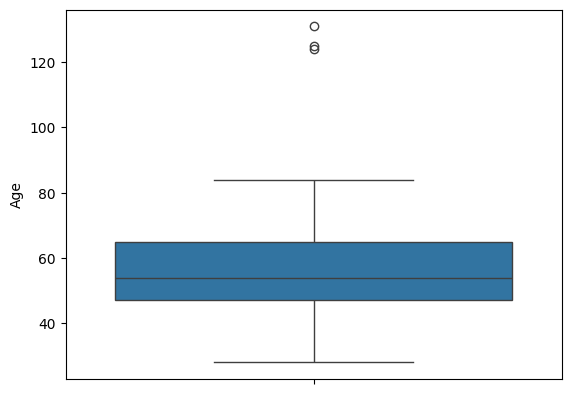

In [18]:
display(CheckOutliers(df_clean, 'Age'))

sns.boxplot(df_clean['Age'])
plt.show()

Terdapat 3 data outlier pada kolom Age. data ini akan saya hapus karena umur pelanggan sangat tua (seperti 124, 125, dan 131 tahun), yang dimana ini tidak masuk akal dengan umur manusia yang mencapai ratusan tahun berbelanja di supermarket, dan persentase outliernya sangat kecil sebesar 0.15 persen

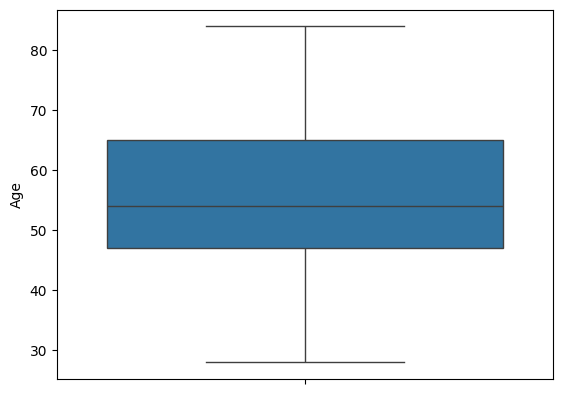

In [19]:
df_clean = RemoveOutliers(df_clean, 'Age')
sns.boxplot(df_clean['Age'])
plt.show()

##### Income Outliers

,Q1,Q3,IQR,Lower Fence,Upper Fence,Min Value,Max Value,Outliers Sum,Outliers Percentage
0,35482.0,68474.5,32992.5,-14006.75,117963.25,1730.0,666666.0,8,0.39


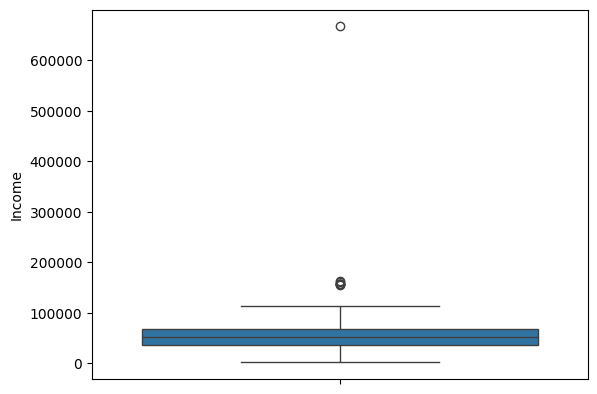

In [20]:
display(CheckOutliers(df_clean, 'Income'))

sns.boxplot(df_clean['Income'])
plt.show()

Terdapat 8 data outlier pada kolom Age. data ini akan dihapus karena persentase outliernya sangat kecil sebesar 0.39 persen

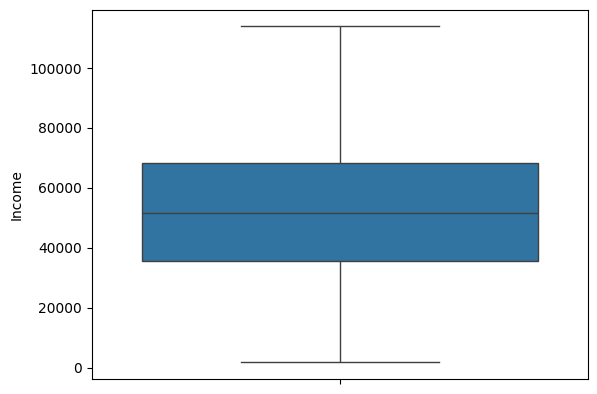

In [21]:
df_clean = RemoveOutliers(df_clean, 'Income')
sns.boxplot(df_clean['Income'])
plt.show()

In [22]:
print(f'Jumlah baris setelah outlier pada kolom Age dan Income dihapus : {df_clean.shape[0]}')

Jumlah baris setelah outlier pada kolom Age dan Income dihapus : 2023


### Pengelompokan Kolom Diskrit

Pengelompokan kolom diskrit diperlukan untuk pengecekan korelasi pada kolom diskrit yang memiliki outlier, karena akan menggunakan metode Phik Correlation yang sensitif terhadap nilai ekstrem (outlier). Pengelompokan dilakukan pada beberapa kolom (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Total_Purchase)

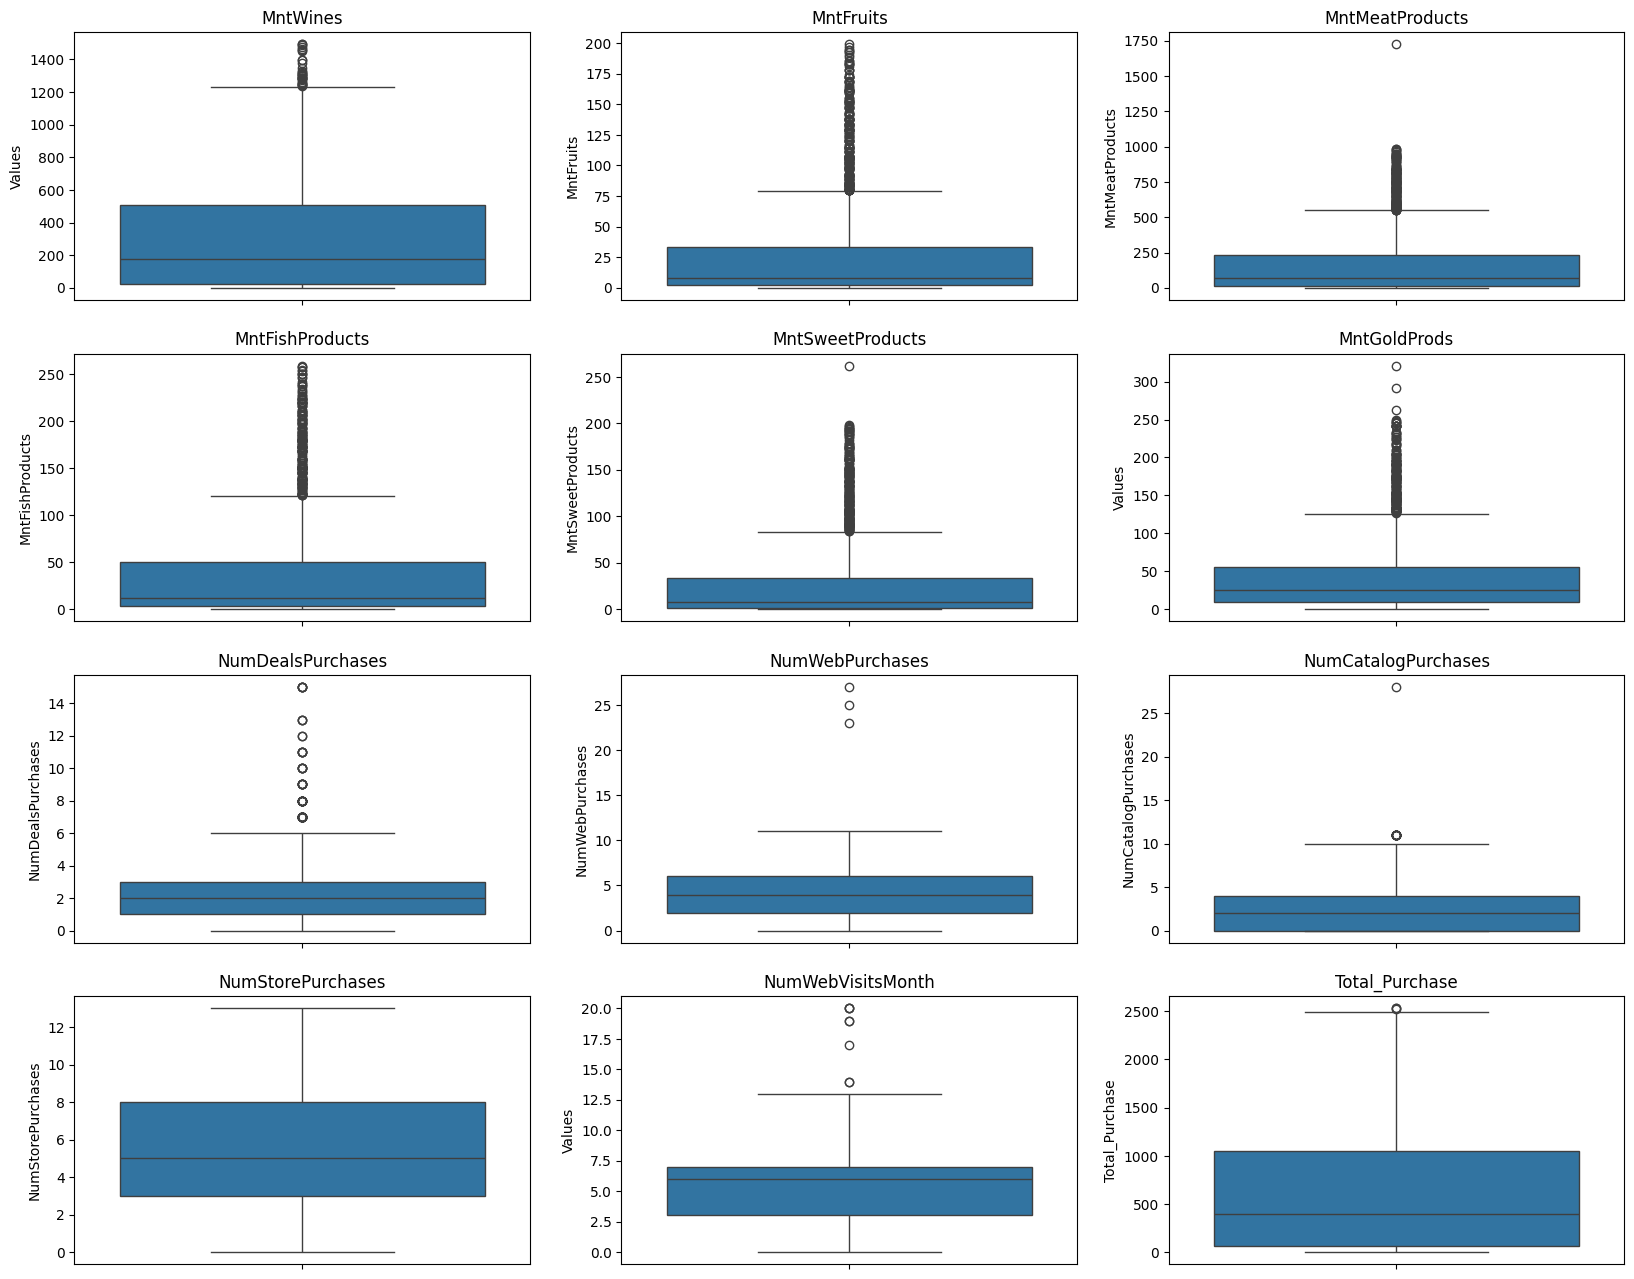

In [23]:
num_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Total_Purchase'
]

fig, axs = plt.subplots(4, 3,  figsize=(20,16))
axs = axs.flatten()
for i, data in enumerate(num_cols):
    if i % 5 == 0:
        axs[i].set_ylabel('Values')
    sns.boxplot( data=df_clean[data], ax=axs[i])
    axs[i].set_title(data)

In [24]:
def calculate_all_numeric_outliers(df):
    numeric_cols = num_cols
    
    all_results = pd.DataFrame()
    
    for col in numeric_cols:
        result_df = CheckOutliers(df, col)
        result_df.insert(0, 'Column', col)
        all_results = pd.concat([all_results, result_df], ignore_index=True)
    
    return all_results

calculate_all_numeric_outliers(df_clean)

,Column,Q1,Q3,IQR,Lower Fence,Upper Fence,Min Value,Max Value,Outliers Sum,Outliers Percentage
0,MntWines,24.0,507.0,483.0,-700.50,1231.50,0,1493,32,1.58
1,MntFruits,2.0,33.0,31.0,-44.50,79.50,0,199,221,10.92
2,MntMeatProducts,16.0,230.0,214.0,-305.00,551.00,0,1725,168,8.30
3,MntFishProducts,3.0,50.0,47.0,-67.50,120.50,0,259,202,9.99
4,MntSweetProducts,1.0,34.0,33.0,-48.50,83.50,0,262,219,10.83
5,MntGoldProds,9.0,56.0,47.0,-61.50,126.50,0,321,184,9.10
6,NumDealsPurchases,1.0,3.0,2.0,-2.00,6.00,0,15,74,3.66
7,NumWebPurchases,2.0,6.0,4.0,-4.00,12.00,0,27,3,0.15
8,NumCatalogPurchases,0.0,4.0,4.0,-6.00,10.00,0,28,19,0.94
9,NumStorePurchases,3.0,8.0,5.0,-4.50,15.50,0,13,0,0.00


In [25]:
def label_by_quartiles(data, column, label_suffix='Amount Purchases'):
    # Menghitung kuartil dari kolom yang ditentukan
    Q1 = data[column].quantile(0.25)
    Q2 = data[column].quantile(0.5)
    Q3 = data[column].quantile(0.75)
    
    # Fungsi untuk mengklasifikasikan setiap nilai berdasarkan kuartil
    def classify_by_quartiles(x):
        if x <= Q1:
            return f'Low {label_suffix}'
        elif x <= Q2:
            return f'Medium to Low {label_suffix}'
        elif x <= Q3:
            return f'Medium to High {label_suffix}'
        else:
            return f'High {label_suffix}'
    
    # Menerapkan fungsi klasifikasi ke kolom
    categorized_column = data[column].apply(classify_by_quartiles)
    return categorized_column


df_clean['MntWinesCat'] = label_by_quartiles(df_clean, 'MntWines')
df_clean['MntFruitsCat'] = label_by_quartiles(df_clean, 'MntFruits')
df_clean['MntMeatProductsCat'] = label_by_quartiles(df_clean, 'MntMeatProducts')
df_clean['MntFishProductsCat'] = label_by_quartiles(df_clean, 'MntFishProducts')
df_clean['MntSweetProductsCat'] = label_by_quartiles(df_clean, 'MntSweetProducts')
df_clean['MntGoldProdsCat'] = label_by_quartiles(df_clean, 'MntGoldProds')
df_clean['TotalPurchaseCat'] = label_by_quartiles(df_clean, 'Total_Purchase', 'Number of Total Purchase')
df_clean['NumDealsCat'] = label_by_quartiles(df_clean, 'NumDealsPurchases', 'Number Purchases')
df_clean['NumWebCat'] = label_by_quartiles(df_clean, 'NumWebPurchases', 'Number Purchases')
df_clean['NumCatalogCat'] = label_by_quartiles(df_clean, 'NumCatalogPurchases', 'Number Purchases')
df_clean['NumStoreCat'] = label_by_quartiles(df_clean, 'NumStorePurchases', 'Number Purchases')
df_clean['NumWebVisitsCat'] = label_by_quartiles(df_clean, 'NumWebVisitsMonth', 'Number Visit')

In [26]:
df_clean.iloc[:, 14:26].describe()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000
mean,48.839842,306.350964,26.343549,165.932279,37.577855,27.250124,43.909046,607.363816,2.332180,4.116164,2.642610,5.806723
std,28.966164,337.503622,39.762563,219.798185,54.871685,41.559435,51.655402,602.222423,1.893136,2.753085,2.798598,3.229089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000
50%,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,397.000000,2.000000,4.000000,2.000000,5.000000
75%,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,1047.500000,3.000000,6.000000,4.000000,8.000000
max,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2525.000000,15.000000,27.000000,28.000000,13.000000


In [27]:
df_clean.head()

,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Income_Category,Kids,Kidhome,Teenhome,Dt_Customer,Registered_Year,Registered_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Acc_Cmp,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntWinesCat,MntFruitsCat,MntMeatProductsCat,MntFishProductsCat,MntSweetProductsCat,MntGoldProdsCat,TotalPurchaseCat,NumDealsCat,NumWebCat,NumCatalogCat,NumStoreCat,NumWebVisitsCat
0,5524,1957,67,3. Old,Graduate,Single,58138.0,3. Upper-Middle,0,0,0,2012-09-04,2012,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,0,3,11,1,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Number of Total Purchase,Medium to High Number Purchases,High Number Purchases,High Number Purchases,Medium to Low Number Purchases,Medium to High Number Visit
1,2174,1954,70,3. Old,Graduate,Single,46344.0,2. Lower-Middle,2,1,1,2014-03-08,2014,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,3,11,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Number of Total Purchase,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Visit
2,4141,1965,59,2. Elderly,Graduate,Relationship,71613.0,4. Upper,0,0,0,2013-08-21,2013,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,3,11,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Number of Total Purchase,Low Number Purchases,High Number Purchases,Medium to Low Number Purchases,High Number Purchases,Medium to Low Number Visit
3,6182,1984,40,1. Adult,Graduate,Relationship,26646.0,1. Lower,1,1,0,2014-02-10,2014,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,3,11,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Low Number of Total Purchase,Medium to Low Number Purchases,Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Medium to Low Number Visit
4,5324,1981,43,1. Adult,Post Graduate,Relationship,58293.0,3. Upper-Middle,1,1,0,2014-01-19,2014,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,3,11,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,Medium to High Number of Total Purchase,High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases,Medium to Low Number Visit


### Menghapus kolom

List Kolom yang dihapus :
- Year_Birth : Diganti dengan kolom Age
- Dt_Customer : Diganti dengan kolom Registered_Year dan Registered_Month
- Recency : Tidak dipakai
- Z_CostContact & Z_Revenue : tidak ada informasi yang jelas tentang kedua kolom ini, dan tidak dipakai

In [28]:
df_clean.drop(columns=['Year_Birth'], axis=1, inplace=True)
df_clean.drop(columns=['Dt_Customer'], axis=1, inplace=True)
df_clean.drop(columns=['Recency'], axis=1, inplace=True)
df_clean.drop(columns=['Z_CostContact'], axis=1, inplace=True)
df_clean.drop(columns=['Z_Revenue'], axis=1, inplace=True)

In [29]:
## Save file setelah proses cleaning
df_clean.to_csv("supermarket_customer_clean.csv", index=False)
df_clean.to_excel("supermarket_customer_clean.xlsx", index=False)